In [1]:
!pip install transformers
!pip install sklearn
!pip install matplotlib


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
from transformers import AutoTokenizer, AutoModel
import torch
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


In [3]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModel.from_pretrained("bert-base-uncased")


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [8]:
num_clusters = 3  # Set this to 3 or less
kmeans = KMeans(n_clusters=num_clusters)
clusters = kmeans.fit_predict(doc_embeddings.numpy())

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [14]:
documents = [
    "Here is an abstract digital illustration representing Project Fugu for your tech article",
    "This image features a stylized representation of a pufferfish (Fugu)",
    "symbolizing the project, intertwined with digital elements and icons. These icons represent web technologies and native app features",
    "illustrating the concept of bridging the gap between web and native applications",
    "The background has a futuristic, digital aesthetic, fitting the theme of your article.",

]



In [15]:
def encode_documents(docs, model, tokenizer):
    encoded = tokenizer(docs, padding=True, truncation=True, return_tensors="pt")
    with torch.no_grad():
        model_output = model(**encoded)
    return model_output.last_hidden_state.mean(dim=1)

doc_embeddings = encode_documents(documents, model, tokenizer)


In [16]:
num_clusters = 5  # Example number of clusters
kmeans = KMeans(n_clusters=num_clusters)
clusters = kmeans.fit_predict(doc_embeddings.numpy())


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


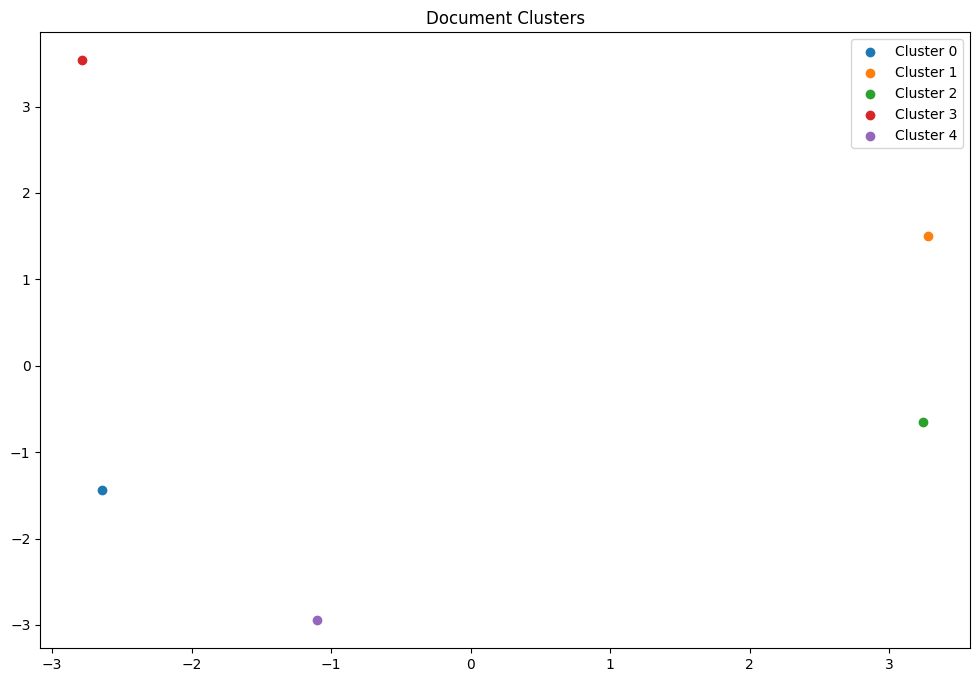

In [17]:
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(doc_embeddings.numpy())

plt.figure(figsize=(12, 8))
for i in range(num_clusters):
    indices = clusters == i
    plt.scatter(reduced_embeddings[indices, 0], reduced_embeddings[indices, 1], label=f'Cluster {i}')
plt.legend()
plt.title('Document Clusters')
plt.show()
